# Predicting Google maps ratings for restaurants
### Marcjanna Jędrych
### Machine Learning I project, 6/2019

### Introduction

Nowadays, a common problem for big companies is how to reccomend a product for application user which will fit his preferences. Due to very satysfying results, machine learning became inseparable part of recommendation systems. 

The two main categories of recommendation system include:
- content-based methods, which are based on user's previous choices,
- colaborative filtering, which includes information not only from user's past choices, but also others users choices, who have simmilar preferences as such user.

In such project, based on the data grabbed from Google Maps 
(<a href href="https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings">UCI travel dataset</a>), based on each users mean ratings for various attraction categories, restaurants mean rating will be predicted. The main goal is to predict it with the smallest error. To evaluate models performance, metrics such as R2, MAE, MSE will be used.  

### Dataset 
Dataset, downloaded from UCI Machine Learning repository, consists of 24 unique attractions categories and user id. Among the categories are:
- Average ratings on churches 
- Average ratings on resorts 
- Average ratings on beaches 
- Average ratings on parks 
- Average ratings on theatres 
- Average ratings on museums 
- Average ratings on malls 
- Average ratings on zoo 
- Average ratings on restaurants 
- Average ratings on pubs/bars 
- Average ratings on local services 
- Average ratings on burger/pizza shops 
- Average ratings on hotels/other lodgings 
- Average ratings on juice bars 
- Average ratings on art galleries 
- Average ratings on dance clubs 
- Average ratings on swimming pools 
- Average ratings on gyms 
- Average ratings on bakeries 
- Average ratings on beauty & spas 
- Average ratings on cafes 
- Average ratings on view points 
- Average ratings on monuments 
- Average ratings on gardens

### Methods

Among the regression methods which will be used in the project are:
- **Linear regression** (OLS) from library statmodels,
- **Ridge regression** from library scikit-learn,
- **Lasso regression** from library scikit-learn,
- **KNN regression** from library scikit-learn.

The first step was data cleaning. Unneccessary (empty) columns were removed and missing observations were replaced with 0. 
In next step, different variable transformations and variable selection methods were tested to select the best model, which includes processes like:
- variable scalling within a specified range (0, 1) with MinMax scaller from scikit-learn,
- logarithmic transformation of variables,
- variable selection according to Mutual Information,
- Forward sequential selection including algorithm from mlxtend library (it minimize criterion function).

The biggest problem to deal with was that ratings equal to 0 and 5 highly influenced final prediction - they might be treated as the outliers. So, in order to eliminate their influence without deleting data (dataset is too small for such operation and information would be lost) different methods of their replacement were used, such as:
- removing those observations, which had values 0 or 5 in dependat variable,
- replacing those obserations with a mean from such variable and variable most correlated to it,
- replacing those observations with a value of a chosen quantile value from such variable,
- deleting observations which had at least 2 values equal to 0 and 5.

##### The detailed description of tested datasets:
To select best features to train models, following datasets were tested with a Linear Regression:
- dataset1:  removing values equal to 0 and 5 from dependent value,
- dataset2: selecting variables with Spearmann correlation higher than 0.5, 
- dataset3: selecting variables with Spearmann correlation higher than 0.5,removing observations with value of the dependent variable equal to 0 or 5, and scaling data with min-max scaller,
- dataset4: replacing 0 and 5 for each variable with the values of chosen quantiles of such variable,
- dataset5: replacing 0 and 5 with the mean of the value of the most correlated variable and the value of such variable, applying logarithmic transformation of dependant variable,
- dataset6: removing observations which had at least 2 values equal to 0 and 5, scalling data with min-max scaller and dependant variable logarithmic transformation.   
        
After selecting the best dataset, which was dataset6, models were optimized to obtain the best results. 

###### Linear regression
  
In case of **linear regression**, one of the possibilities of model optimization is to check linear regression assumtions which are:
- linear correlation of dependent and indepentent variables,
- outlliers homoscedasticity,
- mean of the outliers value = 0,
- no perfect multicollinearity between independent variables.
  
To check this out, following methods were applied:
- analyze of the scatterplot of the observed and predicted values as well as the scatterplot os the outliers values.
- calculating mean of the outliers,
- analyze of variance inflation factor - VIF for each variable.

What is more, to improve linear regression model performance forward sequential selection and Mutual Information of variables were applied. 

###### KNN

In case of KNN, following models were checked:
- model on a raw dataset
- KNN model on a dataset6
- KNN model based on dataset6 with variables selected according to their Mutual Information
- KNN model based on dataset6 with forwad sequential selection (with applied cross validation)

In all attempts best nearest neighbour number was chosen from k=(1, 20).

###### Lasso and Ridge regression

In case of those two models, grid search and cross validation were applied based on dataset6 to find optimal parameters for the models:
- for Ridge regression alpha parameter from grid [1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 5],
- for Lasso regression alpha parameter from grid [1e-15, 1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

###### Models with polynomial features

In the end, each model (LR-OLS, KNN, Lasso regression, Ridge regression) was applied to the dataset with polynomial features, generated with a PolynomialFeatures function from scikit-learn library, which according to the documentation:

   *``Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].``*
   
 ### Results

Overall the highest score was obtained for KNN classifier (k=2) with variables chosen in forward sequential selection. Such model obtained R2 result on test set from dataset6 R2 = 0.93, MAE = 0.1 and MSE = 0. What is more, other results obtained with KNN on different datasets (dataset6, dataset6 with variables selected according to Mutual Information, dataset6 with polynomial features) also were really high (R2 >=0.9).  


|    | dataset0   | dataset6  | dataset6_MI | dataset6_FS |
|----|------------|-----------|-------------|-------------|
| R2 | 0.71 (k=3) | 0.9 (k=3) | 0.89 (k=2)  | 0.93 (k=2)  |

On the other hand, scores were the lowest. Generally, R2 was about 0.8 (in cross-validation slightly lower, about 0.77).  


|     | dataset0 | dataset1 | dataset2 | dataset3 | dataset4 | dataset5 | dataset6 | dataset6_MI | dataset6_FS |
|-----|----------|----------|----------|----------|----------|----------|----------|-------------|-------------|
| R2  | 0.49     | 0.56     | 0.31     | 0.75     | 0.48     | 0.62     | 0.81     | 0.8         | 0.75        |
| MAE | 0.92     | 0.31     | 1.25     | 0.01     | 0.95     | 0.1      | 0        | 0           | 0           |
| MSE | 0.69     | 0.37     | 0.7      | 0.06     | 0.71     | 0.21     | 0.04     | 0.04        | 0.04        |

In case of Ridge regression and Lasso regression the results (R2) were between 0.81 and 0.87. The best scores for those two models were obtained on a dataset6 with polynomial features (0.87), for Lasso regression the best alpha = 0.0001, while in Ridge regression the best alpha = 1.0.

|    | Ridge Regression | Lasso Regression |
|----|-----------------------------|-----------------------------|
| R2 | 0.81 (alpha = 1)            | 0.81 (alpha = 0.0001)       |

Results for polynomial features dataset:

|       | R2   |
|-------|------|
| OLS   | 0.79 |
| KNN   | 0.9  |
| Lasso | 0.87 |
| Ridge | 0.87 |
### Conclusions
In this project, based on a relatively small dataset it could be seen how big is the role of cleaning and preparing dataset to modelling. In the small datasets it is not possible to delete data containing some missing values or containing outliers due to the information loss, so in such case it is neccesary to replace data with some other values, resample dataset etc. Also, as it was showed in a small dataset detecting outliers is an important procedure, as the have big impact on the accuracy.

### Sources
- <a href="https://scikit-learn.org/">scikit-learn documentation</a>
- <a href="https://pandas.pydata.org">Pandas documentation</a>
- <a href="https://www.statsmodels.org/">Statmodels documentation</a>
- <a href="https://docs.scipy.org/">Scipy documentation</a>
- <a href="http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/">mlxtend's forward sequential model selection</a>
- <a href="https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0">veryfying the assumprions of linear regression in python</a>
- <a href="https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/">KNN in python</a>
- <a href="https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/">Ridge and Lasso regression in Python</a>
- <a href="https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b">Ridge and Lasso regression in Python vol.2</a>
- <a href="https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame">excluding outliers from dataframe</a>

In [150]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
from IPython.core.display import HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor
import operator
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
# basic jupyter settings
font = {'family': 'normal',
        'weight': 'normal',
        'size': 12}

figure = {
    'figsize': (10,7),
    'titlesize': 22,
    'titleweight': 'bold'}


matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)
matplotlib.rcParams.update({'figure.titlesize': 22,})

HTML("""
<style>
.output_png {
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [153]:
data = pd.read_csv('google_review_ratings.csv')

In [154]:
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [155]:
data.columns = ['id', 'church', 'resort', 'beach', 'park', 
               'theatre', 'museum', 'mall', 'zoo',
               'restaurant', 'pub', 'local_sevices',
               'burger_pizza', 'hotel', 'juice_bar',
               'art_galleries', 'dance_clubs', 'swimming_pool',
               'gym', 'bakery', 'spa', 'cafe', 'view_point',
                'monument', 'garden',
               'extra']

In [156]:
data.drop(['extra', 'id'], axis=1, inplace=True)

In [157]:
data.describe()

,church,resort,beach,park,theatre,museum,mall,zoo,restaurant,pub,...,art_galleries,dance_clubs,swimming_pool,gym,bakery,spa,cafe,view_point,monument,garden
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [158]:
data.local_sevices = pd.to_numeric(data.local_sevices, errors='coerce')

In [159]:
data = data.fillna(method='ffill', axis=1) # filling all NaN with 0

In [160]:
selected_variables = [x for x in list(data) if x not in ['restaurant']] # list of the independent variables

In [253]:
def split_df(data, proportion=0.7):
    train_df = data.sample(frac=0.7, random_state=1)
    index_to_drop = train_df.index
    test_df = data.drop(index_to_drop)
    test_df.reset_index(inplace=True)
    train_df.reset_index(inplace=True)
    return train_df, test_df

In [252]:
def lrm(data):
    train_df, test_df = split_df(data)
    selected_variables = [x for x in list(data) if x not in ['restaurant', 'id', 'index']]
    lin_reg = sm.OLS(train_df["restaurant"].astype('float'), train_df[selected_variables].astype('float')).fit()
    preds = lin_reg.predict(test_df[selected_variables])
    return train_df, test_df, lin_reg, preds

In [163]:
def print_stats(df, preds):
    try:
        print("R^2: %.2f" % metrics.r2_score(df["restaurant"].values, preds.values))
        print("Mean squared error: %.2f" % metrics.mean_squared_error(df["restaurant"].values, preds.values))
        print("Mean absolute error: %.2f" % metrics.mean_absolute_error(df["restaurant"].values, preds.values))
    except AttributeError:
        preds = pd.Series(preds)
        print("R^2: %.2f" % metrics.r2_score(df["restaurant"].values, preds.values))
        print("Mean squared error: %.2f" % metrics.mean_squared_error(df["restaurant"].values, preds.values))
        print("Mean absolute error: %.2f" % metrics.mean_absolute_error(df["restaurant"].values, preds.values))

In [341]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

### Benchmark model

In [254]:
train_df, test_df, lin_reg, preds = lrm(data)

In [255]:
print_stats(test_df, preds) # R2 0.49, MSE 0.92, MAE 0.69

R^2: 0.49
Mean squared error: 0.92
Mean absolute error: 0.69


Obtained result is not satysfying. On the plot it might be seen that there is a huge number of outliers caused by the observations with rating for restaurant = 5.

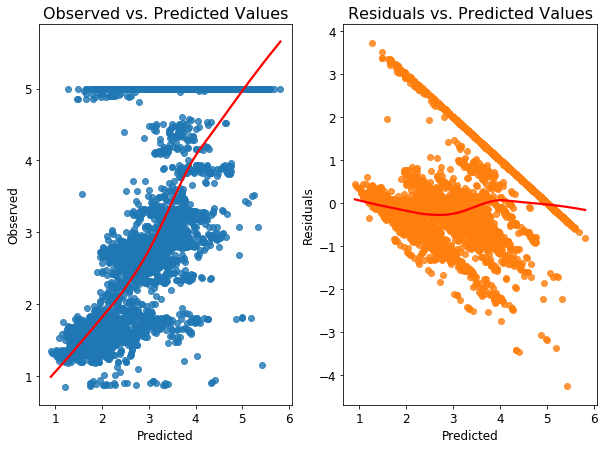

In [256]:
linearity_test(lin_reg, train_df['restaurant'])

## Selecting the best dataset  
  
  
### Dataset1 (removed observations equal to 0 or 5 in dependent variable)

In [257]:
data1 = data[(data.restaurant!=5) & (data.restaurant != 0.)] # removing all observations = 5 or = 1 from dependent variable

In [258]:
train_df1, test_df1, lin_reg1, preds1 = lrm(data1)

In [259]:
print_stats(test_df1, preds1)

R^2: 0.56
Mean squared error: 0.31
Mean absolute error: 0.37


As we might see, removing extreme variables gave a small improvement in the model accurracy. Unfortunately, it is not possible to remove observations with values equals 0 or 5 from other columns, because it is a relatively small datset and it would cause information loss.

### Dataset2 (selected the most correlated variables)

As linear regression model is detecting only linear correlations. To find out, which variables have the biggest correlation with dependent variable Spearman correlation will be calculated between each pair consisted of each independent and dependent variable. After analyzing results I decided that I will keep only the variables with statistic higher than 0.5.

In [260]:
data2 = data[highly_corelated]

In [261]:
highly_corelated = []
for col in data.columns:
    if stats.spearmanr(data[col], data["restaurant"])[0] > 0.5:
        highly_corelated.append(col)

In [262]:
train_df2, test_df2, lin_reg2, preds2 = lrm(data2)

In [263]:
print_stats(test_df2, preds2)

R^2: 0.31
Mean squared error: 1.25
Mean absolute error: 0.70


Model accuracy dropped drastically. In the figure it might be seen that number of the outliers raised.

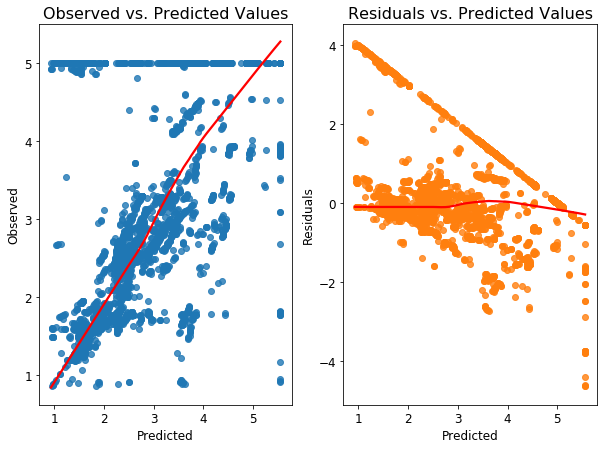

In [264]:
linearity_test(lin_reg2, train_df2['restaurant'])

### Dataset3 (selected most correlated variables with removed outliers and normalized data)

Model accuracy in the previous example wasn't good, so selecting only linearly correlated variables didn't bring exceptet results. 
In such case, not only selecting correlated variables, but also scaling data and then removing outliers will be applied.

In [332]:
data3 = data2.copy(deep=True)

In [333]:
np.sum(data3.restaurant==5), np.sum(data.restaurant==0)

(1474, 0)

In [334]:
data3.drop(data3[data3.restaurant == 5].index, inplace=True)
data3.drop(data3[data3.restaurant == 0].index, inplace=True)

In [335]:
data3_1.restaurant = np.log1p(data3.restaurant) 

In [336]:
x1 = data3.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler.fit_transform(x1)
data3_1 = pd.DataFrame(x_scaled1)

In [337]:
data3_1.columns = data3.columns

In [338]:
data3_2 = data3_1[(np.abs(stats.zscore(data3_1)) < 2).all(axis=1)] 

In [339]:
train_df3, test_df3, lin_reg3, preds3 = lrm(data3_2)
print_stats(test_df3, preds3) # r2 0.73, MSE 0.00, MAE 0.05

R^2: 0.75
Mean squared error: 0.01
Mean absolute error: 0.06


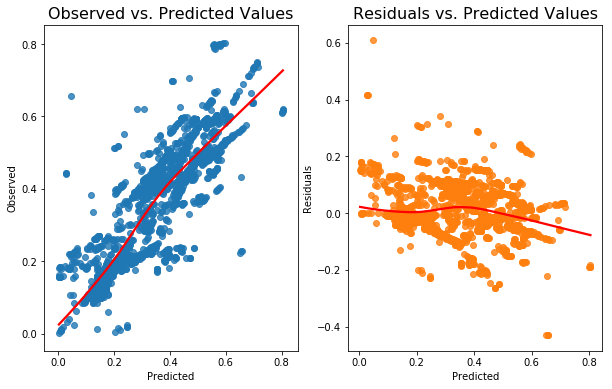

In [342]:
linearity_test(lin_reg3, train_df3['restaurant'])

As far it is the best model. Also, nearly all the outliers were removed.

### Dataset4 (replaced 0 and 5 in each variable with the values of chosen quantiles)

As far we know, that the values 0 and 5, which might be considered as outliers, cause low model accuracy. One possible solution to minimize their impact without deleting all observations with the values of chosen quantiles. For such purpose I chose median and 75% quantile.

In [274]:
data4 = data.copy(deep=True)

In [275]:
# removes 0 and replaces it with mean from column
for col in data4.columns:
    data4[col].replace(0, np.quantile(data4[col].values, 0.5), inplace=True)
# removes 5 and replaces it with value of 3rd percentile
for col in data4.columns:
    data4[col].replace(5, np.quantile(data4[col].values, 0.75), inplace=True)

In [276]:
train_df4, test_df4, lin_reg4, preds4 = lrm(data4)

In [277]:
print_stats(test_df4, preds4)

R^2: 0.48
Mean squared error: 0.95
Mean absolute error: 0.71


This solution didn't bring an improvement in the model prediction. It suggests that scalling data and outlier removal might be the most accurate technique.

### Dataset5 (replaced 0 and 5 with mean of the variable and most correlated variable)

In such model the values equal to 5 and 0 will be replaced with mean of the column and a variable which is most correlated with it.

In [278]:
data5 = data.copy(deep=True)

Firstly, values 5 and 0 from the dependent variable are removed. It would be highly reccomended to remove all values 0 and 5 from the dataset, however it is too small for such operation - after performing it only about 150 observation would be left, which is too little to do a good prediction.

In [279]:
data5.drop(data5[data5.restaurant == 5].index, inplace=True)
data5.drop(data5[data5.restaurant == 0].index, inplace=True)

For the rest od the columns the following operation was done:
- the most correlated variable was chosen and the pairs of correlated variables were saved in the dictionary,
- then values 0 and 5 for each variable (except dependent variable) were changed for the mean of the value from a pair.

In [280]:
cors = {}
for col in selected_variables:
    cors_for_col = {}
    for column in selected_variables:
        if column != col:
            cors_for_col[column] = stats.spearmanr(data[col], data[column])[0]
    maksimum = max(cors_for_col.items(), key=operator.itemgetter(1))[0]
    cors[col] = maksimum

In [281]:
# removes 0 and replaces it with mean from column
for col in selected_variables:
    data5[col].replace(0, data5[col].median(), inplace=True)
    
# removes 5 and replaces it with value of 3rd percentile
for col in selected_variables:
    data5[col] = np.where(data5[col] == 5, (data5[cors[col]] + data5[col])/2, data5[col])

Due to the fact that dependent variable is not normally distributed, as well as after each model homoscedasticity of the outlliers was violated log transformation of dependent variable was performed.

In [282]:
data5.restaurant = np.log2(data5.restaurant) # r2 0.62

In [283]:
train_df5, test_df5, lin_reg5, preds5 = lrm(data5)
print_stats(test_df5, preds5)

R^2: 0.62
Mean squared error: 0.10
Mean absolute error: 0.21


In such case the results were better than in previous try (MAE and MSE), however still they were much worse than in model with scalled variables and removed outliers (in the plot there are much more outliers).

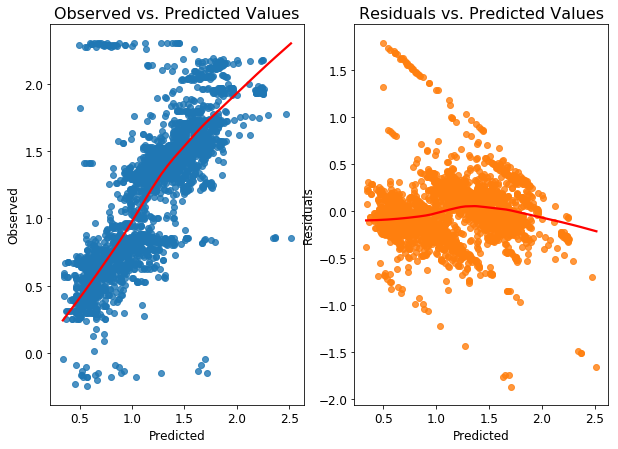

In [284]:
linearity_test(lin_reg5, train_df5['restaurant'])

However, the assumption about equal variance of the residuals was not satisfied. Also, the colinearity of dependent and independent variables is not perfect.
Probably, it is still the cause of imputs equal 0 and 5 notes, so the method of filling these values wasn't the perfect one.

### Dataset6 (dataset normalized and removed outliers)

In the beginning observations with value 0 and 5 in the dependent variable are removed. Then values 0 and 5 from other columns are replaced with median from such column (0) or with the the value from such column and a corresponding value from most correlated column. 

In [285]:
data6 = data.copy(deep=True)
data6.drop(data6[data6.restaurant == 5].index, inplace=True)
data6.drop(data6[data6.restaurant == 0].index, inplace=True)
# removes 0 and replaces it with mean from column
for col in selected_variables:
    data6[col].replace(0, data6[col].median(), inplace=True)
# removes 5 and replaces it with value of 3rd percentile
for col in selected_variables:
    data6[col] = np.where(data6[col] == 5, (data6[cors[col]] + data6[col])/2, data6[col])

Next thing which can be done to improve model performance is variable scaling. To do it a built-in function from sklearn library would be used.

In [286]:
x = data6.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [287]:
df.columns = list(data6) # setting df names

Also, dependent variable is transformed logarithmically.

In [288]:
df.restaurant = np.log1p(df.restaurant) 

Next, key transformation is removing outliers based Z-score.
For each column, first Z-score of each value in the column is computed, relative to the column mean and standard deviation. Then  the absolute of Z-score is taken because the direction does not matter, only if it is below the threshold. .all(axis=1) ensures that for each row, all column satisfy the constraint. Finally, result of the condition is used to index the dataframe.

In [289]:
df = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)] 

In [290]:
train_df6, test_df6, lin_reg6, preds6 = lrm(df)
print_stats(test_df6, preds6) # r2 0.81, MSE 0.00, MAE 0.04

R^2: 0.81
Mean squared error: 0.00
Mean absolute error: 0.04


As it might be seen from the plot, a big part of the outliers was removed, what caused a radical model accuracy improvement.  

### Checking regression model assumptions

In [291]:
lin_reg6.resid.mean()

0.0012830186693617899

The assumption about the mean of the residuals equal to 0 was fine.

To check the assumption about no perfect multicollinearity variance inflation factor - VIF was calculated.  
There was no result above 5, which, according to the <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html"> statmodels </a> documentation should be concidered as a corelated variable.

In [292]:
X = df[[x for x in list(df) if x != 'restaurant']]
X_constant = sm.add_constant(X)

In [293]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,church,resort,beach,park,theatre,museum,mall,zoo,pub,local_sevices,...,art_galleries,dance_clubs,swimming_pool,gym,bakery,spa,cafe,view_point,monument,garden
vif,2.078008,1.297933,1.206134,2.643142,3.657245,1.968314,1.988316,2.559795,3.788478,2.976532,...,1.936019,1.219601,1.678863,2.561555,2.026755,2.409908,1.975638,1.998883,1.699219,1.571573


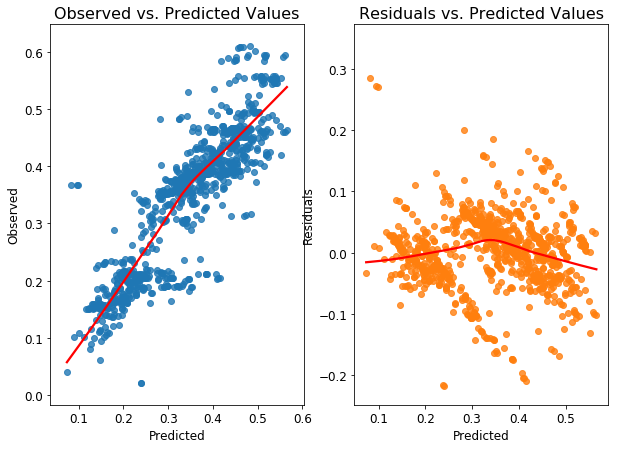

In [294]:
linearity_test(lin_reg6, train_df6["restaurant"])   

Although correlation is not perfectly linear, and there are some outliers, the most of them were removed, what caused improved model accuracy.

### Improving accuracy of the model by applying feature selection

#### Mutual information
A very common method to apply for feature selection is Mutual Information, which is a measure of dependance of the predicted variable from predictors. It is very comfortable measure, because it can be applied both for categorical and continuous variables. Both functions are aviable in scikit-learn library.  
In such model I decided to do forward selection based on the calculated mutual information. 

In [295]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(df[selected_variables], df['restaurant'])
mi_col_pairs = {x:y for x, y in zip(selected_variables, mi)} # dictionary of variable-mutual info pairs

In [296]:
from operator import itemgetter
# ordering dictionary descending
dict_ordered = list(sorted(mi_col_pairs.items(), key=itemgetter(1)))[::-1]
dict_ordered

[('pub', 2.357399810475067),
 ('zoo', 2.1938469843619313),
 ('local_sevices', 2.1731834861059687),
 ('burger_pizza', 1.9921366411465637),
 ('mall', 1.9893634815330605),
 ('juice_bar', 1.9500437542314382),
 ('beach', 1.8686918305195737),
 ('hotel', 1.859320855597403),
 ('park', 1.8351194492247616),
 ('theatre', 1.8209505739660812),
 ('museum', 1.810176309149079),
 ('art_galleries', 1.8005891319539522),
 ('resort', 1.7807962095559748),
 ('view_point', 1.7519681133410443),
 ('monument', 1.6893869137739852),
 ('garden', 1.6237285779826336),
 ('church', 1.61836932822292),
 ('dance_clubs', 1.5446628911588176),
 ('swimming_pool', 1.4678330138887037),
 ('bakery', 1.3998396626514586),
 ('spa', 1.3312961227808215),
 ('cafe', 1.3248455688584437),
 ('gym', 1.2996207851640036)]

In [297]:
best_mi_scores = [x[0] for x in dict_ordered]

In [298]:
# creating linear regression model based on k-best variables
r2 = []
for x in range(1, len(best_mi_scores)+1):
    data = df[best_mi_scores[:x]]
    data = data.assign(restaurant = pd.Series(pd.to_numeric(df.restaurant, errors='coerce')).values)
    train, test, lr, pred = lrm(data)
    r2.append(metrics.r2_score(test["restaurant"].values, pred.values))

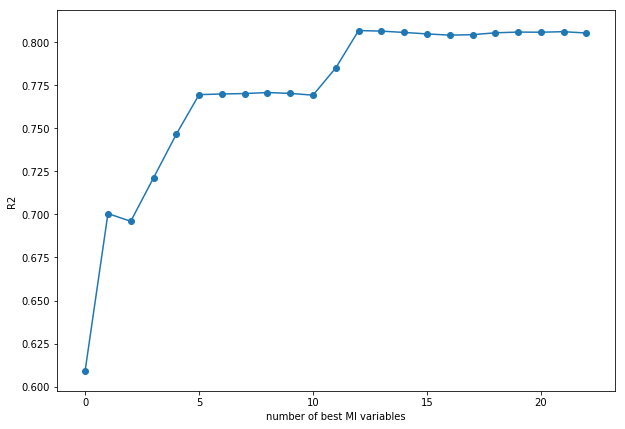

In [299]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(0, len(best_mi_scores)), r2)
ax.scatter(np.arange(0, len(best_mi_scores)), r2)
ax.set_xlabel('number of best MI variables')
ax.set_ylabel('R2')
plt.show()

According to the plot, the best accuracy is achived with just 12 out of 23 predictors. It is a good news, as far as our goal is to minimize complexity of the model - the procedure reduces not neccessary variables.

#### Forward selection based on criterion function

Although forward selection was not included in scikit-learn library, it was implemented in mlxtend. In such case, the method looks a little bit simmilar to R syntax - model, score metrics, number of features in forward selection, number of cross-validation splits are declared and then such a model is fit to the data.

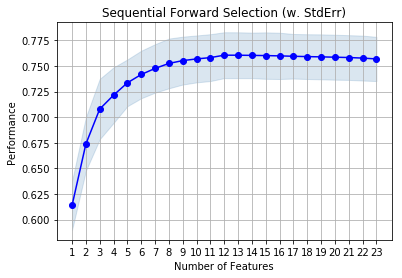

In [300]:
X = train_df6[selected_variables]
y = pd.Series(train_df6['restaurant'])

lr = LinearRegression()

sfs = SFS(lr,
          k_features=23,
          forward=True,
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [301]:
sfs.k_score_ # best cross validation accuracy in forward selection

0.7569517509720188

Again, the best score was achieved for 12 features, however not all chosen features are the same as in the variables with highest Mutual Information. In such case, according to mlxtend  <a href="http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/"> documentation </a>, criterion function is maximized.

In [302]:
forward_sel_features = set(['resort',
   'beach','park','mall', 'zoo', 'pub','local_sevices',
   'juice_bar', 'art_galleries', 'swimming_pool', 'cafe', 'monument'])

mi_features = set(['pub', 'zoo', 'local_sevices', 'mall', 'burger_pizza', 
 'juice_bar', 'beach', 'hotel', 'park', 'theatre', 'museum', 'art_galleries', 'resort', 'view_point'])

In [303]:
forward_sel_features.intersection(mi_features) # just 9 out of 12 common features

{'art_galleries',
 'beach',
 'juice_bar',
 'local_sevices',
 'mall',
 'park',
 'pub',
 'resort',
 'zoo'}

## KNN regression

### KNN  on whole, not transformed dataset

To have a benchmark for KNN model and see how does dataset6 improve regression result KNN regression on a raw dataset will be performed.

In [304]:
train_df_KNN, test_df_KNN = train_df.copy(deep=True), test_df.copy(deep=True)

rmse_val = [] #to store rmse values for different k
r2 = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(train_df_KNN[selected_variables], train_df_KNN['restaurant'])  #fit the model
    pred = model.predict(test_df_KNN[selected_variables]) #make prediction on test set
    r2_score = metrics.r2_score(test_df_KNN.restaurant, pred)
    error = sqrt(mean_squared_error(test_df_KNN.restaurant, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2.append(r2_score)
    print('RMSE value for k= ' , K , 'is:', error, 'R2:', r2_score)

RMSE value for k=  1 is: 0.7865564083436192 R2: 0.6595646507420543
RMSE value for k=  2 is: 0.7469673363596773 R2: 0.6929719007942328
RMSE value for k=  3 is: 0.7202650119008229 R2: 0.7145306154057116
RMSE value for k=  4 is: 0.7231361196808312 R2: 0.7122502132711404
RMSE value for k=  5 is: 0.7327160859114883 R2: 0.7045756058662763
RMSE value for k=  6 is: 0.7385742707662247 R2: 0.6998327889349092
RMSE value for k=  7 is: 0.7339716109006319 R2: 0.7035623061724857
RMSE value for k=  8 is: 0.7375954738735879 R2: 0.7006278560358915
RMSE value for k=  9 is: 0.7371648561610491 R2: 0.7009773086052071
RMSE value for k=  10 is: 0.7429759543783107 R2: 0.6962443124639026
RMSE value for k=  11 is: 0.7442960608934487 R2: 0.6951639380706167
RMSE value for k=  12 is: 0.7459274627798466 R2: 0.6938261501317404
RMSE value for k=  13 is: 0.7450749530534531 R2: 0.6945255935553502
RMSE value for k=  14 is: 0.7456047227021847 R2: 0.6940910370007387
RMSE value for k=  15 is: 0.749108865096911 R2: 0.6912088

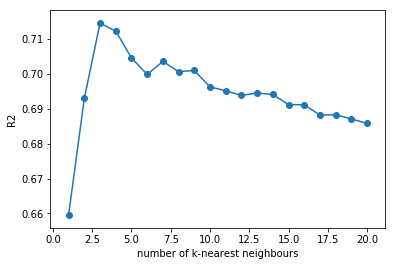

In [306]:
plt.plot(np.arange(1, len(r2)+1), r2)
plt.scatter(np.arange(1, len(r2)+1), r2)
plt.xlabel('number of k-nearest neighbours')
plt.ylabel('R2')
plt.show()

For a first try, ** without feature selection and data transformation ** obtained R2 result is about 0.1 lower   
than the best
linear regression model for a model with k=3.   

### KNN on dataset6

In [307]:
train_df_KNN1, test_df_KNN1 = train_df6.copy(deep=True), test_df6.copy(deep=True)

rmse_val = [] #to store rmse values for different k
r2 = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(train_df_KNN1[selected_variables], train_df_KNN1['restaurant'])  #fit the model
    pred = model.predict(test_df_KNN1[selected_variables]) #make prediction on test set
    r2_score = metrics.r2_score(test_df_KNN1.restaurant, pred)
    error = sqrt(mean_squared_error(test_df_KNN1.restaurant, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2.append(r2_score)
    print('RMSE value for k= ' , K , 'is:', error, 'R2:', r2_score)

RMSE value for k=  1 is: 0.043041743247783364 R2: 0.8814355194644273
RMSE value for k=  2 is: 0.03962970914074053 R2: 0.8994882886324179
RMSE value for k=  3 is: 0.039405335957227006 R2: 0.9006232094264722
RMSE value for k=  4 is: 0.039596146848772946 R2: 0.8996584627272144
RMSE value for k=  5 is: 0.04067686000528594 R2: 0.894106393565919
RMSE value for k=  6 is: 0.04085443042566433 R2: 0.8931798414827483
RMSE value for k=  7 is: 0.04117698708329622 R2: 0.8914864353652692
RMSE value for k=  8 is: 0.041977293666139 R2: 0.8872273543771695
RMSE value for k=  9 is: 0.042172088392378945 R2: 0.8861782878651532
RMSE value for k=  10 is: 0.04241222643625205 R2: 0.8848783406974189
RMSE value for k=  11 is: 0.04260187152086362 R2: 0.883846512386547
RMSE value for k=  12 is: 0.043224264094314985 R2: 0.8804278291826717
RMSE value for k=  13 is: 0.04352719946782957 R2: 0.8787459232722374
RMSE value for k=  14 is: 0.043783087621894284 R2: 0.8773160732203571
RMSE value for k=  15 is: 0.0439040696893

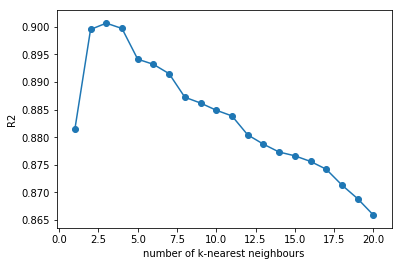

In [308]:
plt.plot(np.arange(1, len(r2)+1), r2)
plt.scatter(np.arange(1, len(r2)+1), r2)
plt.xlabel('number of k-nearest neighbours')
plt.ylabel('R2')
plt.show()

On transformed dataset the R2 was about 0.1 better than in the best linear regression model. The best score was achieved for k=3.

### KNN regression on data with variables with highest Mutual Information

To improve basic model based on dataset6 next model was built with selected variables according to their Mutual Information.

In [309]:
rmse_val = [] #to store rmse values for different k
r2 = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(train_df_KNN1[list(mi_features)], train_df_KNN1['restaurant'])  #fit the model
    pred = model.predict(test_df_KNN1[list(mi_features)]) #make prediction on test set
    r2_score = metrics.r2_score(test_df_KNN1.restaurant, pred)
    error = sqrt(mean_squared_error(test_df_KNN1.restaurant, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2.append(r2_score)
    print('RMSE value for k= ' , K , 'is:', error, 'R2:', r2_score)

RMSE value for k=  1 is: 0.04555763827086674 R2: 0.8671696546557809
RMSE value for k=  2 is: 0.041092443505818796 R2: 0.8919315726890178
RMSE value for k=  3 is: 0.04124565069243135 R2: 0.8911242357085927
RMSE value for k=  4 is: 0.04173276500343157 R2: 0.88853738762198
RMSE value for k=  5 is: 0.04152908128614382 R2: 0.8896227562069117
RMSE value for k=  6 is: 0.04197415273640059 R2: 0.8872442300579747
RMSE value for k=  7 is: 0.04178273525724964 R2: 0.8882703001360559
RMSE value for k=  8 is: 0.04282297134933249 R2: 0.8826377317564104
RMSE value for k=  9 is: 0.042999598679307804 R2: 0.8816675919663894
RMSE value for k=  10 is: 0.04326614996356555 R2: 0.8801959774174524
RMSE value for k=  11 is: 0.04294970669433849 R2: 0.8819420323715577
RMSE value for k=  12 is: 0.0432702092235488 R2: 0.8801734961711041
RMSE value for k=  13 is: 0.04347777212957041 R2: 0.8790211472016587
RMSE value for k=  14 is: 0.043399027955532084 R2: 0.8794589687636689
RMSE value for k=  15 is: 0.043967350060466

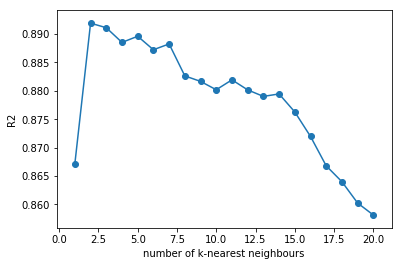

In [310]:
plt.plot(np.arange(1, len(r2)+1), r2)
plt.scatter(np.arange(1, len(r2)+1), r2)
plt.xlabel('number of k-nearest neighbours')
plt.ylabel('R2')
plt.show()

R2 score is slightly lower than in previous model based on all the variables and the best result was obtained for k=2.

### KNN regression based on data selected in forward feature selection 

Like in Linear regression model selection, forward selection from mtextend will be used to determine best variables. Number of features will be set to 12, based on the observations done duringforward selection for linear regression.

In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsRegressor(n_neighbors=2, p=1)

sfs1 = SFS(knn, 
           k_features=12, 
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

sfs1 = sfs1.fit(train_df_KNN1[selected_variables], train_df_KNN1['restaurant'])

In [312]:
sfs1.k_feature_names_

('museum',
 'mall',
 'pub',
 'local_sevices',
 'burger_pizza',
 'hotel',
 'art_galleries',
 'dance_clubs',
 'swimming_pool',
 'bakery',
 'spa',
 'monument')

In [313]:
knn.fit(train_df_KNN1[selected_variables], train_df_KNN1['restaurant'])
knn_feature_selection_preds = knn.predict(test_df_KNN1[selected_variables])

In [314]:
print_stats(test_df_KNN1, knn_feature_selection_preds)

R^2: 0.93
Mean squared error: 0.00
Mean absolute error: 0.01


In such case also the results of the regression for k=2 are the best from all the models.  
What might be worth noticing is that again selected features completly differ from those selected in forward selection for linear regression and those with highest MI.

In [315]:
forward_sel_features1 = set(['museum',
 'mall',
 'pub',
 'local_sevices',
 'burger_pizza',
 'hotel',
 'art_galleries',
 'dance_clubs',
 'swimming_pool',
 'bakery',
 'spa',
 'monument'])

print('common features selected in forward selection for linear regression and k-NN:\n',
      forward_sel_features1.intersection(forward_sel_features), '\n\n')

print('common features selected in forward selection for k-NN and MI highest-score features:\n',
      forward_sel_features1.intersection(mi_features))

common features selected in forward selection for linear regression and k-NN:
 {'mall', 'swimming_pool', 'monument', 'local_sevices', 'art_galleries', 'pub'} 


common features selected in forward selection for k-NN and MI highest-score features:
 {'museum', 'mall', 'burger_pizza', 'local_sevices', 'art_galleries', 'hotel', 'pub'}


### Ridge and Lasso regression

The last techiniques used in the project will be Ridge and Lasso regression. The models are based on dataset6.

In [316]:
X, y = train_df6[selected_variables], train_df6['restaurant']
parameters_ridge = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 5]}
ridge_model = RidgeCV(alphas=parameters_ridge['alpha'], store_cv_values=True).fit(X, y)
print('model accuracy (R2):', ridge_model.score(X, y),
      '\nbest alpha:', ridge_model.alpha_)

model accuracy (R2): 0.7764133392340506 
best alpha: 1.0


For Ridge regression in training phase, the best accuracy (R2) was achieved for alpha = 1. The model was used to predict test set and R2 was even higher - 0.81.

In [317]:
preds_ridge = ridge_model.predict(test_df6[selected_variables])
print_stats(test_df6, preds_ridge)

R^2: 0.81
Mean squared error: 0.00
Mean absolute error: 0.04


A similar procedure was applied in case of Lasso regression. From all proposed alphas the best accuracy was achieved for alpha=0.0001. Again, the result for test set was higher than result for training set - 0.81.

In [318]:
lasso = Lasso()
X, y = train_df6[selected_variables], train_df6['restaurant']
parameters_lasso = {'alpha': [1e-15, 1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}
lasso_model_cv = GridSearchCV(lasso, param_grid=parameters_lasso, scoring='r2', cv=5)
lasso_model = lasso_model_cv.fit(X, y)
print('model accuracy (R2):', lasso_model_cv.score(X, y),
     '\nbest alpha', lasso_model.best_params_)

model accuracy (R2): 0.7759593937220269 
best alpha {'alpha': 0.0001}


In [319]:
preds_lasso = lasso_model.predict(test_df6[selected_variables])
print_stats(test_df6, preds_lasso)

R^2: 0.81
Mean squared error: 0.00
Mean absolute error: 0.04


### Visualising grid search results for KNN and Ridge and Lasso regression

In [320]:
X, y = train_df6[selected_variables], train_df6['restaurant']
train_scores_ridge, test_scores_ridge = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=parameters_ridge['alpha'],
    cv=5, scoring="r2", n_jobs=1)

train_scores_lasso, test_scores_lasso = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=parameters_lasso['alpha'],
    cv=5, scoring="r2", n_jobs=1)

parameters_KNN = np.arange(1, 20, 1)
train_scores_knn, test_scores_knn = validation_curve(
    neighbors.KNeighborsRegressor(), X, y, param_name="n_neighbors", param_range=parameters_KNN,
    cv=5, scoring="r2", n_jobs=1)

In [321]:
def plot_scores(train_scores, test_scores, param_range, title, xlabel, log_x_ax=True):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.ylim(np.min(test_scores)-0.05, np.max(test_scores)+0.05)
    lw = 2
    if log_x_ax:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    else:
        plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.scatter(param_range, train_scores_mean, color='darkorange')
    if log_x_ax:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    else:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.scatter(param_range, test_scores_mean, color='navy')
    plt.legend(loc="best")
    plt.show()

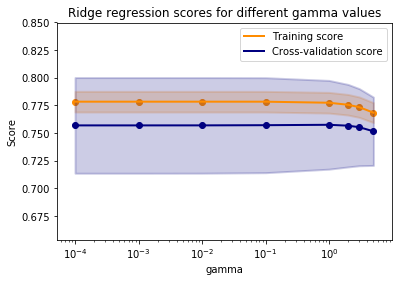

In [322]:
fig, ax = plt.subplots()
plot_scores(train_scores_ridge, test_scores_ridge, parameters_ridge['alpha'], 
            'Ridge regression scores for different gamma values', 'gamma')
plt.show()

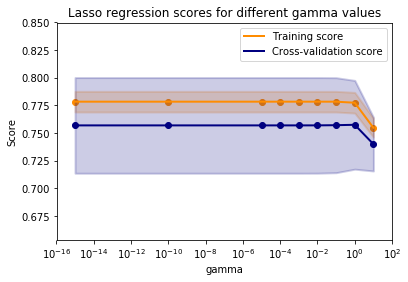

In [323]:
fig, ax = plt.subplots()
plot_scores(train_scores_lasso, test_scores_lasso, parameters_lasso['alpha'],
            'Lasso regression scores for different gamma values', 'gamma')
plt.show()

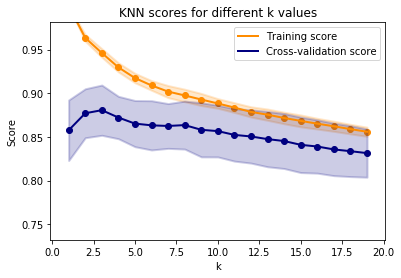

In [324]:
fig, ax = plt.subplots()
plot_scores(train_scores_knn, test_scores_knn, parameters_KNN, 
            'KNN scores for different k values', 'k', log_x_ax=False)
plt.show()

### Using polynomial features in regression

One of the possible solutins of model performance improvement is using polynomial transformations on dataset. In scikit-learn a special object (PolynomialFeatures) is purposed for this purpose. 

In [325]:
lasso_params = {'fit__alpha':[1e-15, 1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 20, 50, 100]}
ridge_params = {'fit__alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 5]}
knn_params = {'fit__n_neighbors':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}


pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])
pipe4 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', neighbors.KNeighborsRegressor())])

models3 = {'OLS':  pipe1.fit(train_df6[selected_variables], train_df6['restaurant']),
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params, cv=5).fit(train_df6[selected_variables], 
                                                                    train_df6['restaurant']).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params, cv=5).fit(train_df6[selected_variables], 
                                                                    train_df6['restaurant']).best_estimator_,
          'KNN': GridSearchCV(pipe4, param_grid=knn_params, cv=5).fit(train_df6[selected_variables], 
                                                                    train_df6['restaurant']).best_estimator_ , 
          }

In [326]:
preds_ols_poly = models3['OLS'].predict(test_df6[selected_variables])
preds_lasso_poly = models3['Lasso'].predict(test_df6[selected_variables])
preds_ridge_poly = models3['Ridge'].predict(test_df6[selected_variables])
preds_knn_poly = models3['KNN'].predict(test_df6[selected_variables])

In [327]:
print('OLS')
print_stats(test_df6, pd.Series(preds_ols_poly))
print('LASSO REGRESSION')
print_stats(test_df6, pd.Series(preds_lasso_poly))
print('RIDGE REGRESSION')
print_stats(test_df6, pd.Series(preds_ridge_poly))
print('KNN REGRESSION')
print_stats(test_df6, pd.Series(preds_knn_poly))

OLS
R^2: 0.79
Mean squared error: 0.00
Mean absolute error: 0.04
LASSO REGRESSION
R^2: 0.87
Mean squared error: 0.00
Mean absolute error: 0.03
RIDGE REGRESSION
R^2: 0.87
Mean squared error: 0.00
Mean absolute error: 0.03
KNN REGRESSION
R^2: 0.90
Mean squared error: 0.00
Mean absolute error: 0.02


It might be seen that such transformation gave a hudge improvement in score of Lasso and Ridge regression (R2 rose 
from 0.81 to 0.87). In case of benchmark OLS and KNN model it didn't cause any improvement, but additional features were added, so in case of a big dataset it might extend regression time drastically.